In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, neighbors, datasets
from sklearn.cluster import KMeans

%matplotlib inline

In [9]:
flowers = pd.read_csv('iris_data.txt',",",header=None)

In [10]:
flowers.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
flowers

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
flowers.columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']

In [13]:
flowers

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


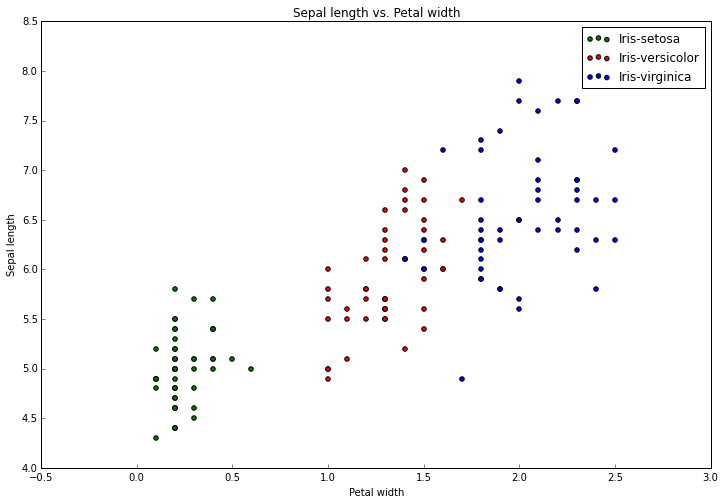

In [203]:
speciesdata=flowers.groupby('Species')
SlPw=speciesdata.get_group('Iris-setosa').plot(kind='scatter', x='Petal width', y='Sepal length',c='Green', label='Iris-setosa', figsize=(12,8));
speciesdata.get_group('Iris-versicolor').plot(kind='scatter', x='Petal width', y='Sepal length',c='Red',label='Iris-versicolor',ax=SlPw);
speciesdata.get_group('Iris-virginica').plot(kind='scatter', x='Petal width', y='Sepal length',c='Blue', label='Iris-virginica',ax=SlPw);
SlPw.yaxis.tick_left()
SlPw.xaxis.tick_bottom()
plt.title('Sepal length vs. Petal width')
plt.show()

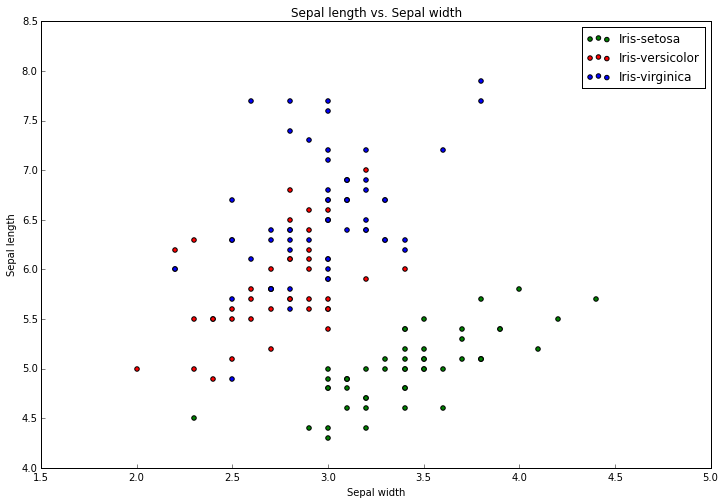

In [204]:
speciesdata=flowers.groupby('Species')
SlSw=speciesdata.get_group('Iris-setosa').plot(kind='scatter', x='Sepal width', y='Sepal length',c='Green',label='Iris-setosa',figsize=(12,8));
speciesdata.get_group('Iris-versicolor').plot(kind='scatter', x='Sepal width', y='Sepal length',c='Red',label='Iris-versicolor',ax=SlSw);
speciesdata.get_group('Iris-virginica').plot(kind='scatter', x='Sepal width', y='Sepal length',c='Blue', label='Iris-virginica',ax=SlSw);
SlSw.yaxis.tick_left()
SlSw.xaxis.tick_bottom()
plt.title('Sepal length vs. Sepal width')
plt.show()

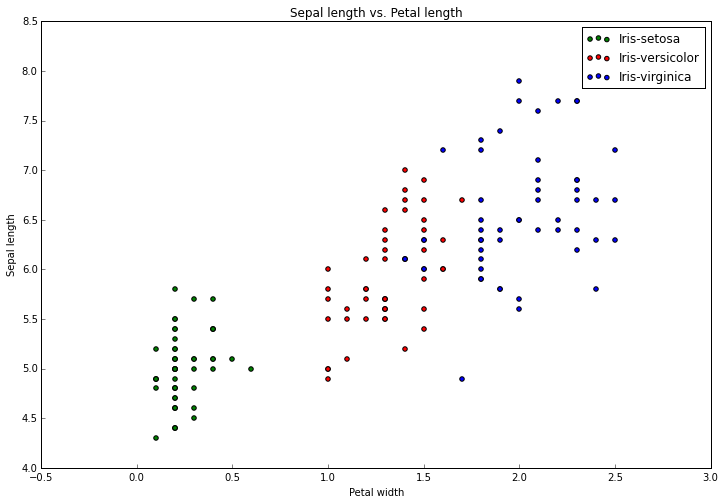

In [202]:
speciesdata=flowers.groupby('Species')
SlPl=speciesdata.get_group('Iris-setosa').plot(kind='scatter', x='Petal width', y='Sepal length',c='Green',label='Iris-setosa',figsize=(12,8));
speciesdata.get_group('Iris-versicolor').plot(kind='scatter', x='Petal width', y='Sepal length',c='Red',label='Iris-versicolor',ax=SlPl);
speciesdata.get_group('Iris-virginica').plot(kind='scatter', x='Petal width', y='Sepal length',c='Blue', label='Iris-virginica',ax=SlPl);
SlPl.yaxis.tick_left()
SlPl.xaxis.tick_bottom()
plt.title('Sepal length vs. Petal length')
plt.show()


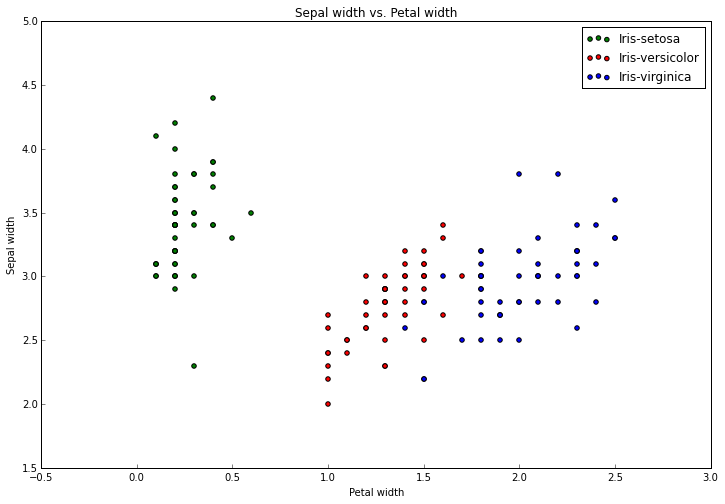

In [205]:
speciesdata=flowers.groupby('Species')
SwPw=speciesdata.get_group('Iris-setosa').plot(kind='scatter', x='Petal width', y='Sepal width',c='Green',label='Iris-setosa',figsize=(12,8));
speciesdata.get_group('Iris-versicolor').plot(kind='scatter', x='Petal width', y='Sepal width',c='Red',label='Iris-versicolor',ax=SwPw);
speciesdata.get_group('Iris-virginica').plot(kind='scatter', x='Petal width', y='Sepal width',c='Blue', label='Iris-virginica',ax=SwPw);
SwPw.yaxis.tick_left()
SwPw.xaxis.tick_bottom()
plt.title('Sepal width vs. Petal width')
plt.show()

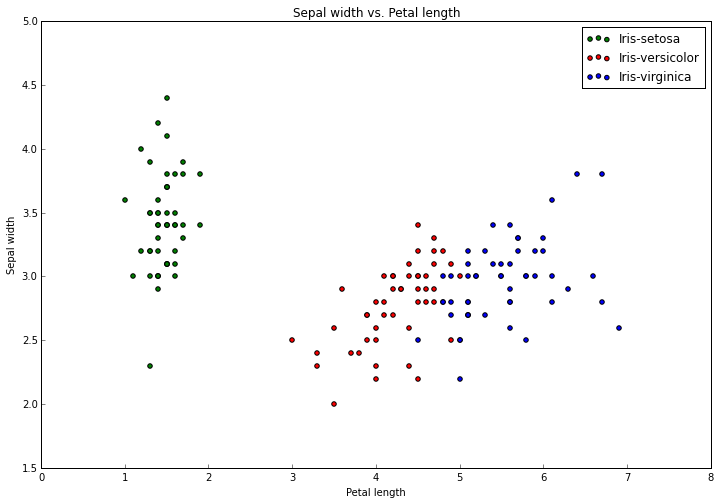

In [206]:
speciesdata=flowers.groupby('Species')
SwPl=speciesdata.get_group('Iris-setosa').plot(kind='scatter', x='Petal length', y='Sepal width',c='Green',label='Iris-setosa',figsize=(12,8));
speciesdata.get_group('Iris-versicolor').plot(kind='scatter', x='Petal length', y='Sepal width',c='Red',label='Iris-versicolor',ax=SwPl);
speciesdata.get_group('Iris-virginica').plot(kind='scatter', x='Petal length', y='Sepal width',c='Blue', label='Iris-virginica',ax=SwPl);
SwPl.yaxis.tick_left()
SwPl.xaxis.tick_bottom()
plt.title('Sepal width vs. Petal length')
plt.show()

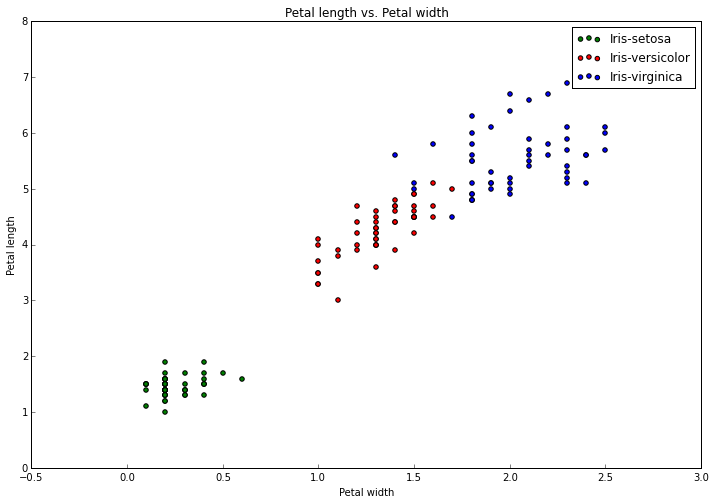

In [207]:
speciesdata=flowers.groupby('Species')
PlPw=speciesdata.get_group('Iris-setosa').plot(kind='scatter', x='Petal width', y='Petal length',c='Green',label='Iris-setosa',figsize=(12,8));
speciesdata.get_group('Iris-versicolor').plot(kind='scatter', x='Petal width', y='Petal length',c='Red',label='Iris-versicolor',ax=PlPw);
speciesdata.get_group('Iris-virginica').plot(kind='scatter', x='Petal width', y='Petal length',c='Blue', label='Iris-virginica',ax=PlPw);
PlPw.yaxis.tick_left()
PlPw.xaxis.tick_bottom()
plt.title('Petal length vs. Petal width')
plt.show()

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

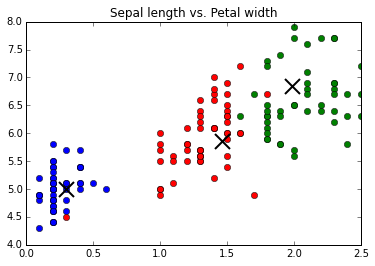

In [234]:
kmeans = cluster.KMeans(n_clusters=3)
numericflowers=flowers.loc[:,['Petal width', 'Sepal length']]
kmeans.fit(numericflowers)
centroids = kmeans.cluster_centers_
flowers_array = numericflowers.values
for i in range(3):
    group = flowers_array[np.where(labels==i)]    
    pyplot.plot(group[:,0],group[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.title('Sepal length vs. Petal width')
pyplot.show()

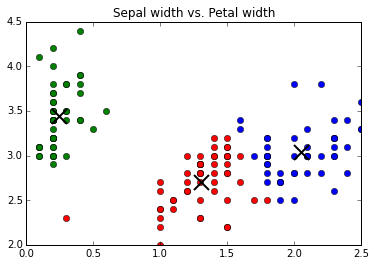

In [235]:
kmeans = cluster.KMeans(n_clusters=3)
numericflowers=flowers.loc[:,['Petal width', 'Sepal width']]
kmeans.fit(numericflowers)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
flowers_array = numericflowers.values
for i in range(3):
    group = flowers_array[np.where(labels==i)]    
    pyplot.plot(group[:,0],group[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.title('Sepal width vs. Petal width')
pyplot.show()

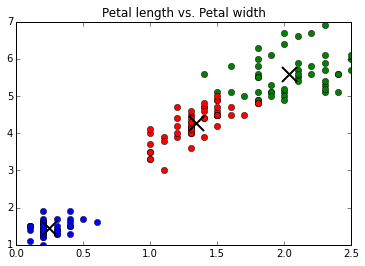

In [236]:
kmeans = cluster.KMeans(n_clusters=3)
numericflowers=flowers.loc[:,['Petal width', 'Petal length']]
kmeans.fit(numericflowers)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
flowers_array = numericflowers.values
for i in range(3):
    group = flowers_array[np.where(labels==i)]    
    pyplot.plot(group[:,0],group[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.title('Petal length vs. Petal width')
pyplot.show()

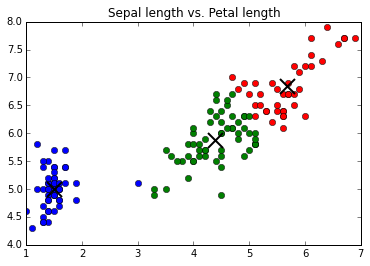

In [237]:
kmeans = cluster.KMeans(n_clusters=3)
numericflowers=flowers.loc[:,['Petal length', 'Sepal length']]
kmeans.fit(numericflowers)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
flowers_array = numericflowers.values
for i in range(3):
    group = flowers_array[np.where(labels==i)]    
    pyplot.plot(group[:,0],group[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.title('Sepal length vs. Petal length')
pyplot.show()

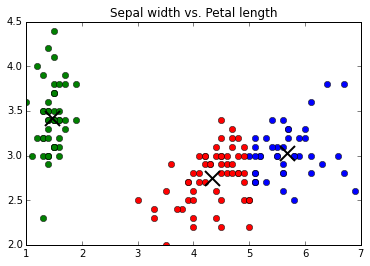

In [238]:
kmeans = cluster.KMeans(n_clusters=3)
numericflowers=flowers.loc[:,['Petal length', 'Sepal width']]
kmeans.fit(numericflowers)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
flowers_array = numericflowers.values
for i in range(3):
    group = flowers_array[np.where(labels==i)]    
    pyplot.plot(group[:,0],group[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.title('Sepal width vs. Petal length')
pyplot.show()

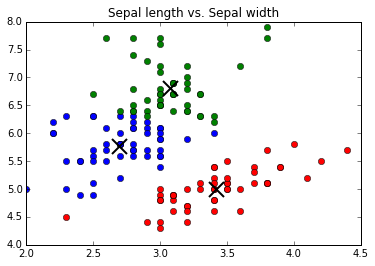

In [239]:
kmeans = cluster.KMeans(n_clusters=3)
numericflowers=flowers.loc[:,['Sepal width', 'Sepal length']]
kmeans.fit(numericflowers)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
flowers_array = numericflowers.values
for i in range(3):
    group = flowers_array[np.where(labels==i)]    
    pyplot.plot(group[:,0],group[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.title('Sepal length vs. Sepal width')
pyplot.show()

In [245]:
kmeans = cluster.KMeans(n_clusters=3)
numericflowers=flowers.loc[:,['Sepal length': 'Petal length']]
kmeans.fit(numericflowers)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
flowers_array = numericflowers.values
for i in range(3):
    group = flowers_array[np.where(labels==i)]    
    pyplot.plot(group[:,0],group[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
plt.title('All 4 variables')
pyplot.show()

SyntaxError: invalid syntax (<ipython-input-245-6d233e2e8de7>, line 2)